In [20]:
from sklearn.datasets.samples_generator import make_circles
import matplotlib.pyplot as plt
import numpy as np
X,y = make_circles(100,factor=.1,noise=.1)
# 构建以数据圆圈（middle clump）为中心核函数
r = np.exp(-(X**2).sum(1))

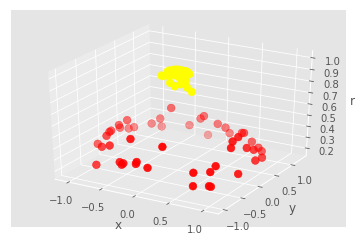

In [32]:
# 通过三维图来可视化新增的维度
from mpl_toolkits.mplot3d import axes3d
plt.style.use('ggplot')
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d') 
ax1.scatter(X[:,0],X[:,1],r,c=y,s=60,cmap='autumn')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('r')
plt.show()

In [39]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
#     画二维SVC决策函数
    if not ax:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    #创建评估模型的网格
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
#     print(xy)
    P=model.decision_function(xy).reshape(X.shape)#求出样本的支持向量
#     print(P)
    #画决策边界
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    #画支持向量
    print(plot_support)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='b')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

True


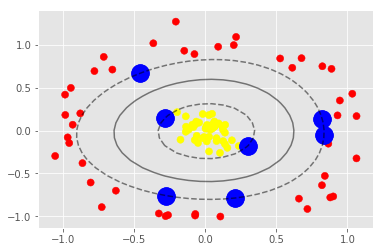

In [45]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolors='b')